## i. Perkenalan
`Marchelly Gideon Tambunan`\

## Working Area

### Query Sql Untuk Membuat Dataset

SELECT report_date, load_type, load_time, load_weight, dropoff_site 

FROM `bigquery-public-data.austin_waste.waste_and_diversion` 

where report_date between '2021-01-01' and '2021-07-09'

## Import Library

import library yang akan digunakan

In [73]:
import pandas as pd             # import library yang dipakai
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Loading data csv yang telah diambil

In [74]:
# loading data scv dengan memasukan beberapa string yang dianggap missing value
df = pd.read_csv('h8dsft_P0GC2_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"])

menampilkan indeks teratas dan terbawah dari data tsb

In [75]:
df.head() #menampilkan 5 data teratas

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF


In [76]:
df.tail() #menampilkan 5 data terbawah

,report_date,load_type,load_time,load_weight,dropoff_site
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH
26156,2021-03-01,RECYCLED METAL,2021-03-01 10:22:00.000000 UTC,360.0,AUSTIN IRON AND METAL


In [77]:
df['report_date'] = pd.to_datetime(df['report_date'])   #mengganti type data pada report_date menjadi datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_type     26157 non-null  object        
 2   load_time     26157 non-null  object        
 3   load_weight   25109 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


## Data Cleaning

#### Mengecek kembali data yang telah diambil apakah ada missing value atau tidak

In [78]:
percent_missing = df.isnull().sum() * 100 / len(df)                     # melihat ada berapa persen missing value pada tiap kolom
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
report_date,0.000000
load_type,0.000000
load_time,0.000000
load_weight,4.006576
dropoff_site,0.000000


setelah diketahui ada sekitar 4% missing value data, kita akan melakukan groupping antara dropoff_site dengan load_weight dan ingin melihat hasil describe nya. sebelum kita melakukan handling missing value, kita akan melihat terlebih dahulu distribusi dari data berikut menggunakan skewness

In [79]:
numcols = ['load_weight']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))

load_weight skewness: 3.335938213321684


dari hasil skewness diatas dapat diartikan data tersebut merupakan distribusi tidak normal
maka dari itu, missing values tersebut akan diisi dengan median dari kolom 'load_weight'

In [80]:
df = df.fillna(round(df['load_weight'].median(),0)) #mengisi missing value dengan median
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-07-08,TIRES,2021-07-08 12:00:00.000000 UTC,2260.0,MRF
1,2021-07-08,TIRES,2021-07-08 11:00:00.000000 UTC,1260.0,MRF
2,2021-07-08,TIRES,2021-07-08 03:00:00.000000 UTC,800.0,MRF
3,2021-05-01,TIRES,2021-05-01 12:29:00.000000 UTC,760.0,MRF
4,2021-07-03,TIRES,2021-07-03 12:09:00.000000 UTC,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,ORGANICS,2021-03-01 11:26:00.000000 UTC,12100.0,ORGANICS BY GOSH
26153,2021-03-01,ORGANICS,2021-03-01 04:27:00.000000 UTC,10900.0,ORGANICS BY GOSH
26154,2021-03-01,ORGANICS,2021-03-01 05:55:00.000000 UTC,21800.0,ORGANICS BY GOSH
26155,2021-03-01,ORGANICS,2021-03-02 01:10:00.000000 UTC,5640.0,ORGANICS BY GOSH


selanjutnya kita akan mengurutkan data berdasarkan report_date

In [81]:
df.sort_values('report_date', inplace=True, ignore_index = True) #mengurutkan data berdasarkan report_date
df

,report_date,load_type,load_time,load_weight,dropoff_site
0,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,11300.0,ONION CREEK
1,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,11300.0,ONION CREEK
2,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,11300.0,ONION CREEK
3,2021-01-01,SWEEPING,2021-01-01 12:00:00.000000 UTC,11300.0,ONION CREEK
4,2021-01-02,ORGANICS,2021-01-08 07:21:00.000000 UTC,7040.0,ORGANICS BY GOSH
...,...,...,...,...,...
26152,2021-07-09,SWEEPING,2021-07-09 12:00:00.000000 UTC,11300.0,ONION CREEK
26153,2021-07-09,BRUSH,2021-07-09 01:04:00.000000 UTC,9800.0,HORNSBY BEND
26154,2021-07-09,BRUSH,2021-07-09 03:45:00.000000 UTC,5500.0,HORNSBY BEND
26155,2021-07-09,BRUSH,2021-07-09 10:07:00.000000 UTC,7360.0,HORNSBY BEND


apabila data sudah diurutkan, mari cek kembali apakah masih ada missing values

In [82]:
df.isnull().sum() #mengekecek missing value

report_date     0
load_type       0
load_time       0
load_weight     0
dropoff_site    0
dtype: int64

sekarang sudah tidak ada missing values pada data yang akan kita pakai. 

selanjutnya, kita akan menghapus kolom load time karena pada kolom tersebut tidak ada data insight yang ingin didapat

In [83]:
df.drop(['load_time'], axis = 1, inplace = True) #menghapus kolom dengan inplace true agar data update
df.head()

,report_date,load_type,load_weight,dropoff_site
0,2021-01-01,SWEEPING,11300.0,ONION CREEK
1,2021-01-01,SWEEPING,11300.0,ONION CREEK
2,2021-01-01,SWEEPING,11300.0,ONION CREEK
3,2021-01-01,SWEEPING,11300.0,ONION CREEK
4,2021-01-02,ORGANICS,7040.0,ORGANICS BY GOSH


## Problem 1

#### Standar Eksplorasi Data

pada eksplorasi data kali ini, pertama kita akan melihat kapan tanggal pertama dan terakhir data yang kita miliki

In [84]:
print('Tanggal pertama : ', df['report_date'].min())     # menggunakan min dan max pada report_date pada dataframe
print('Tanggal terakhir : ', df['report_date'].max())
print('Rentang waktu data : ', df["report_date"].max() - df["report_date"].min()) #menghitung rentang waktu dengan rumus max - min

Tanggal pertama :  2021-01-01 00:00:00
Tanggal terakhir :  2021-07-09 00:00:00
Rentang waktu data :  189 days 00:00:00


dapat dilihat rentang waktu dari data yang kita punya ada 189 hari

Selanjutnya, mari kita lihat jenis sampah apa saja yang ada di austin. kita bisa menggunakan groupping atau dengan unique indes

In [85]:
df.groupby(['dropoff_site'])[['load_weight']].count() #grouping data antara dropoff_site dengan load_weight

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,50
AUSTIN WOOD RECYCLING,2
BALCONES RECYCLING,3837
BALCONES WOODS,1
GREAT NORTHERN,70
HORNSBY BEND,1655
MRF,168
ON ROUTE HIGH DUMP,81
ONION CREEK,813


In [86]:
print(df.dropoff_site.unique())            #melihat unique values pada dropoff_site
df.dropoff_site.nunique()                  #melihat ada berapa unique values pada dropoff_site

['ONION CREEK' 'ORGANICS BY GOSH' 'TDS LANDFILL' 'MRF'
 'BALCONES RECYCLING' 'TDS - MRF' 'HORNSBY BEND' 'AUSTIN IRON AND METAL'
 'PARK CENTER' 'ON ROUTE HIGH DUMP' 'WILCAB' 'GREAT NORTHERN'
 'AUSTIN WOOD RECYCLING' 'PARK BEND' 'BALCONES WOODS' 'STEINER LANDFILL'
 'WESTFIELD' 'ST. EDWARDS']


18

dari sini terlihat bahwa ada 18 tempat pembuangan sampah

selanjutnya, kita akan melihat ada apa saja tipe sampah di austin. kita dapat memanggilnya dengan hal yang sama

In [87]:
df.groupby(['load_type'])[['load_weight']].sum().round(0) #grouping data antara dropoff_site dengan load_weight

,load_weight
load_type,
BRUSH,9473580.0
BULK,12940740.0
CONTAMINATED ORGANICS,25380.0
CONTAMINATED RECYCLING,5160.0
DEAD ANIMAL,24650.0
GARBAGE COLLECTIONS,145159143.0
LITTER,128680.0
MIXED LITTER,1051780.0
ORGANICS,68088566.0


In [88]:
print(df.load_type.unique())            #melihat unique values pada load_type
df.load_type.nunique()                  #melihat ada berapa unique values pada load_type

['SWEEPING' 'ORGANICS' 'GARBAGE COLLECTIONS' 'TIRES'
 'RECYCLING - SINGLE STREAM' 'DEAD ANIMAL' 'BULK' 'YARD TRIMMING'
 'MIXED LITTER' 'BRUSH' 'RECYCLED METAL' 'LITTER' 'CONTAMINATED RECYCLING'
 'CONTAMINATED ORGANICS']


14

sekarang kita lihat ada 14 tipe sampah di austin

### Central Tendency

sekarang kita akan melihat mean, median dan modus dari tabel berikut untuk melihat insight apa yang kita dapat

In [89]:
print('mean : ', df['load_weight'].mean())                  # menghitung mean dari semua data
print('meadian : ', df['load_weight'].median())             # menghitung median dari semua data
print('dropoff_site mode : ', df.dropoff_site.mode())       # melihat modus pada kolom dropoff_site
print('load_type mode : ', df.load_type.mode())             # melihat modus pada kolom load_type

mean :  12189.989889490384
meadian :  11300.0
dropoff_site mode :  0    TDS LANDFILL
Name: dropoff_site, dtype: object
load_type mode :  0    GARBAGE COLLECTIONS
Name: load_type, dtype: object


dapat dilihat bahwa dropoff_site terbanyak berada di TDS LANDFILL dan load_type terbanyak yaitu GARBAGE COLLECTION

Insight yang akan kita beri pada pemerintah kota bahwa sampah yang dihasilkan kota austin memiliki rata-rata 12.189KG dan tipe sampah yang dihasilkan adalah GARBAGE COLLECTION serta tempat pembuangan terbanyak berada di TDS LANDFILL

### memilih site yang paling menarik

setelah melakukan eksplorasi data, kita dapat melihat bahwa RECYCLING - SINGLE STREAM adalah data load_type yang menurut saya menarik karna termasuk sampah daur ulang dan menurut saya sampah tersebut sangat menarik bagi saya

sekarang kita akan mengecek dimanakah RECYCLING - SINGLE STREAM paling bannyak dibuang

In [90]:
type = df.loc[df['load_type']=='RECYCLING - SINGLE STREAM']                               # memanggil hanya GARBAGE COLLECTION saja
site = type.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum().round(0) # membuat groupping dengan dropoff_site untuk melihat tempat yang paling banyak load_weight
site

dropoff_site
AUSTIN WOOD RECYCLING        8100.0
BALCONES RECYCLING       36315870.0
BALCONES WOODS               8460.0
TDS - MRF                28614260.0
TDS LANDFILL                 7740.0
Name: load_weight, dtype: float64

terlihat RECYCLING - SINGLE STREAM dibuang dimana saja. yang terbanyak diantaranya adalah BALCONES RECYCLING. site tersebutlah yang akan kita eksplor lebih jauh

### Site BALCONES RECYCLING

akhirnya kita memilih site BALCONES RECYCLING. sekarang kita akan memfilter dataframe dengan menampilkan hanya dropoff_site BALCONES RECYCLING

In [91]:
df1 = df.loc[df['dropoff_site']=='BALCONES RECYCLING']        # memuat hanya dropoff_site BALCONES RECYCLING
df1

,report_date,load_type,load_weight,dropoff_site
24,2021-01-02,RECYCLING - SINGLE STREAM,6740.0,BALCONES RECYCLING
25,2021-01-02,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26,2021-01-02,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
27,2021-01-02,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
28,2021-01-02,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
...,...,...,...,...
25958,2021-07-07,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
25964,2021-07-07,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
25966,2021-07-07,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
25967,2021-07-07,RECYCLING - SINGLE STREAM,9900.0,BALCONES RECYCLING


setelah kita memfilter data, kita akan membuat presentasenya dengan dropoff_site lain

In [92]:
# menghitung persentase sampah BALCONES RECYCLING dengan yang lain
balcones_recycling = df1['load_weight'].sum().round(0)
total_waste = df['load_weight'].sum().round(0)
percent = (balcones_recycling/total_waste).round(4)
print(percent*100, ' %')

11.39  %


dapat dilihat bahwa BALCONES RECYCLING dapat menampung kurang lebih 12% sampah di kota Austin

selanjutnya kita akan melihat distribusi data dari BALCONES RECYCLING

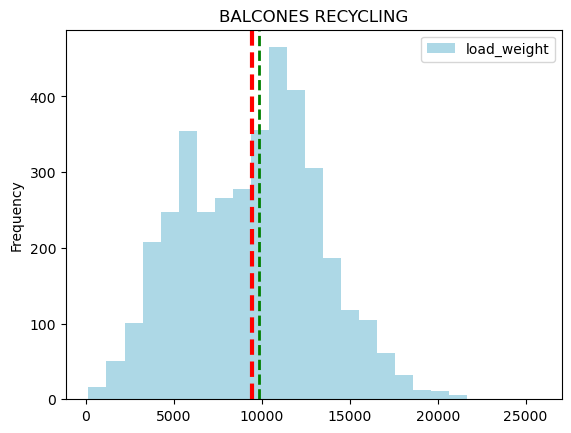

In [93]:
# creating histogram for BALCONES RECYCLING waste load weight data
df1.plot.hist(title='BALCONES RECYCLING', color='lightblue', bins=25)   
plt.axvline(df1['load_weight'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(df1['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

dapat dilihat bahwa data di BALCONES RECYCLING adalah fairly symmetrical. mari kita cari berapakah nilai skew BALCONES RECYCLING

In [94]:
df1['load_weight'].skew()

0.10148179348246145

dari hasil diatas dapat diartikan nilai skew yang kita miliki termasuk kedalam fairly symmetrical

sekarang mari kita lihat apakah ada outliers dalam data yang kita miliki

<AxesSubplot:ylabel='load_weight'>

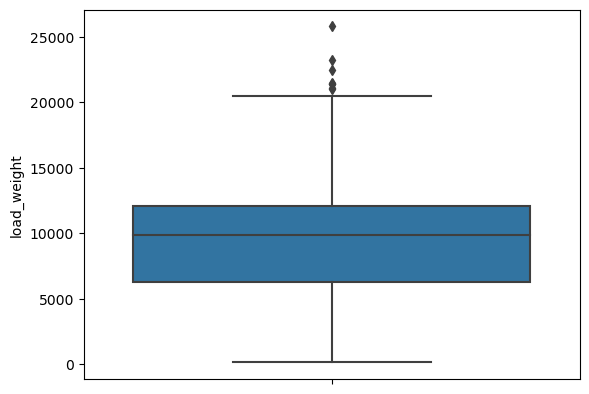

In [95]:
sns.boxplot(data=df1, y = 'load_weight')

hasil diatas dapat terlihat bahwa beberapa outliers berada tidak terlalu jauh dari batas atas

dapat diartikan bahwa kita akan menghandle outliers menggunakan metode IQR. Namun, kita harus mencari dahulu nilai kuartil, jarak kuartil, batas atas dan bawah. setelah itu dapat terlihat apakah outliers yang kita miliki melebihi batas atas atau bawah

langkah awal kita akan mencari nilai kuartil terlebih dahulu

In [96]:
quartiles = percentile(df1['load_weight'], [25, 50, 75])                    #menghitung kuartil

fav_min, fav_max = df1['load_weight'].min(), df1['load_weight'].max()       #menghitung min dan max

q1 = quartiles[0]
q2 = quartiles[1]                                                           #menghitung median
q3 = quartiles[2]

print('Min: %.3f' % fav_min)
print('Q1: %.3f' % q1)
print('Median: %.3f' % q2)                                                  #memanggil rumus diatas
print('Q3: %.3f' % q3)
print('Max: %.3f' % fav_max)

Min: 140.000
Q1: 6260.000
Median: 9840.000
Q3: 12080.000
Max: 25780.000


selanjutnya kita menghitung IQR dan batas atas dan bawah

In [97]:
iqr = q3 - q1                           #rumus IQR
   
up_bound = q3 + 1.5*iqr                   #rumus batas atas

lo_bound = q1 - 1.5*iqr                   #rumus batas bawah

print('IQR = ', iqr)
print('Batas Atas = ', up_bound)        #memanggil 3 rumus diatas
print('Batas Bawah = ', lo_bound)

IQR =  5820.0
Batas Atas =  20810.0
Batas Bawah =  -2470.0


sekarang, kita mendapat apa yang kita inginkan. dikarenakan data yang kita miliki tidak mungkin bernilai minus, maka batas bawah kita ganti dengan nilai '0'. jadi kita hanya perlu mencari data yang melewati batas atas

mari kita cari outliers yang melewati batas atas

In [98]:
df1[(df['load_weight'] > 20810)]     #memanggil data yang melewati batas atas

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20080\3744300750.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[(df['load_weight'] > 20810)]     #memanggil data yang melewati batas atas


,report_date,load_type,load_weight,dropoff_site
136,2021-01-02,RECYCLING - SINGLE STREAM,20980.0,BALCONES RECYCLING
809,2021-01-07,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING
818,2021-01-07,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING
18243,2021-05-11,RECYCLING - SINGLE STREAM,21060.0,BALCONES RECYCLING
18413,2021-05-12,RECYCLING - SINGLE STREAM,23240.0,BALCONES RECYCLING
20447,2021-05-26,RECYCLING - SINGLE STREAM,21470.0,BALCONES RECYCLING
22239,2021-06-09,RECYCLING - SINGLE STREAM,25780.0,BALCONES RECYCLING
22246,2021-06-09,RECYCLING - SINGLE STREAM,22480.0,BALCONES RECYCLING


kita telah menemukan 8 data yang melebihi batas atas

seekarang kita akan melihat persentase outliers BALCONES RECYCLING dan akan membandingkannya dengan seluruh data yang kita miliki

In [99]:
out_all = df1[(df['load_weight'] >  20810)].value_counts().sum()/df.value_counts().sum() * 100 
out_tds = df1[(df['load_weight'] >  20810)].value_counts().sum()/df1['load_weight'].value_counts().sum() * 100

print('outliers BALCONES RECYCLING : Semua data= ', out_all,'%')
print('outliers BALCONES RECYCLING = ', out_tds,'%')

outliers BALCONES RECYCLING : Semua data=  0.030584547157548644 %
outliers BALCONES RECYCLING =  0.20849622100599427 %


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20080\2919090242.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_all = df1[(df['load_weight'] >  20810)].value_counts().sum()/df.value_counts().sum() * 100
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20080\2919090242.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_tds = df1[(df['load_weight'] >  20810)].value_counts().sum()/df1['load_weight'].value_counts().sum() * 100


sekarang kita dapat simpulkan bahwa outliers di TDS LANDFILL hanya 0,01% dari semua data yang kita milliki dan hanya 0,4% outliers di TDS LANDFILL

dengan hasil tersebut kita akan membandingkan apakah ada pengaruh apabila tidak ada outliers

In [100]:
df1.drop(index = [136,809,818,18243,18413,20447,22239,22246], inplace = True)     # menghapus data outliers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20080\4239082790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index = [136,809,818,18243,18413,20447,22239,22246], inplace = True)     # menghapus data outliers


kita cek kembali apakah masih ada outliers

In [101]:
df1[(df1['load_weight'] > 20810)]       # checking if dropping outliers is successful

,report_date,load_type,load_weight,dropoff_site


data yang melewati batas atas sudah tidak ada. kita akan cek kembali menggunakan boxplot

<AxesSubplot:ylabel='load_weight'>

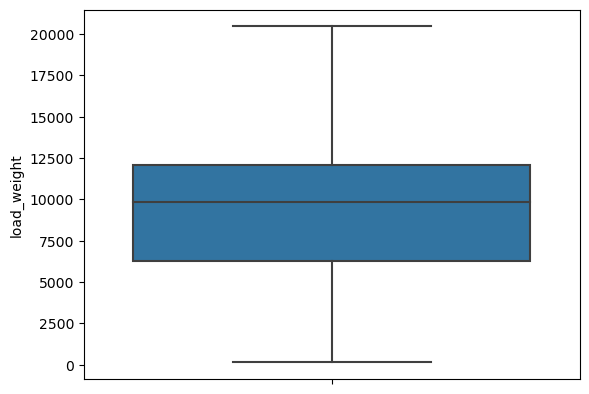

In [102]:
sns.boxplot(data=df1, y = 'load_weight')

dari gambar diatas membuktikan bahwa titik hitam sudah berkurang

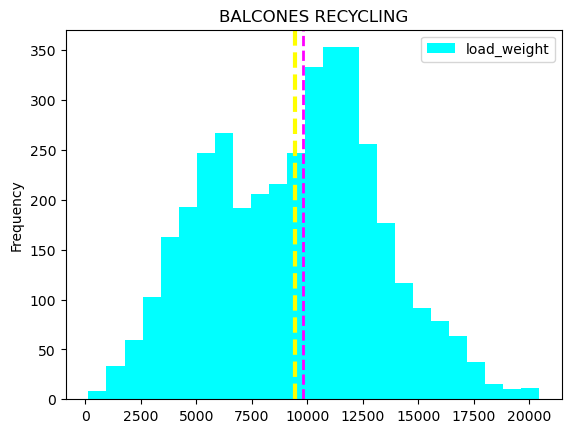

In [103]:
df1.plot.hist(title='BALCONES RECYCLING', color='cyan', bins=25)  
plt.axvline(df1['load_weight'].mean(), color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(df1['load_weight'].median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

sekarang kita akan membandingkan central tendency dari TDS LANDFILL dengan atau tanpa outliers

In [104]:
print('mean dengan outliers = ', df.loc[df['dropoff_site']=='BALCONES RECYCLING']['load_weight'].mean())
print('mean tanpa outliers = ',df1['load_weight'].mean())
print(' ')
print('median dengan outliers = ', df.loc[df['dropoff_site']=='BALCONES RECYCLING']['load_weight'].median())
print('median tanpa outliers = ',df1['load_weight'].median())
print(' ')
print('mode dengan outliers = ', df.loc[df['dropoff_site']=='BALCONES RECYCLING']['load_weight'].mode())
print('mode tanppa outliers = ',df1['load_weight'].mode())

mean dengan outliers =  9464.652071931196
mean tanpa outliers =  9437.98903107861
 
median dengan outliers =  9840.0
median tanpa outliers =  9820.0
 
mode dengan outliers =  0    11880.0
Name: load_weight, dtype: float64
mode tanppa outliers =  0    11880.0
Name: load_weight, dtype: float64


dari perbandingan tersebut dapat diartikan bahwa tidak ada perbedaan yaang signifikan tanpa adanya outliers. bahkan media dan modus pada data tersebut tidak berubah karena hanya 8 dari 3837 yang kita hapus

sekarang kita akan membandingkannya dengan semua data di austin

In [105]:
print('mean dengan BALCONES RECYCLING outliers = ', df['load_weight'].mean())
print('mean tanpa BALCONES RECYCLING outliers = ', df['load_weight'].drop(index = [136,809,818,18243,18413,20447,22239,22246]).mean())
print(' ')
print('median dengan BALCONES RECYCLING outliers = ', df['load_weight'].median())
print('median tanpa BALCONES RECYCLING outliers = ', df['load_weight'].drop(index = [136,809,818,18243,18413,20447,22239,22246]).median())
print(' ')
print('mode dengan BALCONES RECYCLING outliers = ', df['load_weight'].mode())
print('mode tanpa BALCONES RECYCLING outliers = ', df['load_weight'].drop(index = [136,809,818,18243,18413,20447,22239,22246]).mode())

mean dengan BALCONES RECYCLING outliers =  12189.989889490384
mean tanpa BALCONES RECYCLING outliers =  12186.919405690465
 
median dengan BALCONES RECYCLING outliers =  11300.0
median tanpa BALCONES RECYCLING outliers =  11300.0
 
mode dengan BALCONES RECYCLING outliers =  0    11300.0
Name: load_weight, dtype: float64
mode tanpa BALCONES RECYCLING outliers =  0    11300.0
Name: load_weight, dtype: float64


hasilnya seperti sebelumnya, tetap tidak ada perbedaan. hal tersebut dikarenakan hanya 8 data outliers dari 3837 data yang dihapus, jadi tidak ada perbedaan yang signifikan dari 2 perbandingan yang kita buat

### Eksplorasi Statistik

pada sesi ini, kita akan menghitung range, variance, dan standar deviasi dari BALCONES RECYCLING

In [106]:
df1_range = df1['load_weight'].max()- df1['load_weight'].min()  #rumus range

df1_var = df1['load_weight'].var()                              #rumus variance

df1_std = df1['load_weight'].std()                              #rumus standar deviasi

print('Range = ', df1_range)
print('Variance = ', df1_var)                                   #memanggil fungsi diatas
print('Standar deviasi = ', df1_std)

Range =  20320.0
Variance =  14602185.819106389
Standar deviasi =  3821.2806517064914


kesimpulan dari hasil diatas BALCONES RECYCLING memiliki range 20.320 KG, karena kita tau batas bawah berada di 0 KG. kebanyakan data tersebut berada di sekitar 3821 KG. 

In [107]:
df1.sort_values(by=['load_weight']).head()

,report_date,load_type,load_weight,dropoff_site
12516,2021-03-31,RECYCLING - SINGLE STREAM,140.0,BALCONES RECYCLING
23572,2021-06-18,RECYCLING - SINGLE STREAM,500.0,BALCONES RECYCLING
11566,2021-03-25,RECYCLING - SINGLE STREAM,620.0,BALCONES RECYCLING
19596,2021-05-20,RECYCLING - SINGLE STREAM,640.0,BALCONES RECYCLING
25200,2021-07-01,RECYCLING - SINGLE STREAM,700.0,BALCONES RECYCLING


In [108]:
df1.sort_values(by=['load_weight']).tail()

,report_date,load_type,load_weight,dropoff_site
5608,2021-02-12,RECYCLING - SINGLE STREAM,20180.0,BALCONES RECYCLING
12517,2021-03-31,RECYCLING - SINGLE STREAM,20230.0,BALCONES RECYCLING
21292,2021-06-02,RECYCLING - SINGLE STREAM,20360.0,BALCONES RECYCLING
16721,2021-04-29,RECYCLING - SINGLE STREAM,20380.0,BALCONES RECYCLING
21663,2021-06-04,RECYCLING - SINGLE STREAM,20460.0,BALCONES RECYCLING


### Analisis Site Baru

Pemerintah ingin membuat Site baru di Austin. Beliau meminta kita untuk menganalisa dan memperkirakan kapasitas untuk Site baru. kita dapat mengerjakannya dengan menghitung Confidence Interval. Confidence Interval membantu kita memperkirakan kapasitas Site baru. Kita akan menggunakan hasil analisis kita di BALCONES RECYCLING untuk memberikan hasil perkiraan kita kepada Pemerintah. setelah kita mmenangani data sampah terbanyak di Austin, kita dapat memberikan perkiraan dari nilai maksimal untuk Site baru yang tidak akan lebih besar dari yang diperlukan

pertama kita harus membuat groupping data dari tanggal, jadi kita tau berapa banyak sampah pergi ke site per harinya.

In [109]:
daily_input = df1[['report_date','load_weight']].groupby(df1['report_date']).sum().sort_values('report_date')
daily_input.mean().round(2)

load_weight    384447.45
dtype: float64

selanjutnya kita akan menghitung kapasitas site baru dengan Confidence Interval

In [110]:
conf = stats.norm.interval(0.95, daily_input.load_weight.mean(), daily_input.load_weight.std())
conf

(15977.401000624814, 752917.4926163964)

karena kita dapat batas bawah dari confidence interval, kita dapat menyarankan pemerintah untuk kapasitas site baru antara 15.977 - 752.917 KG. jika mereka membuat lebih dari 752.917 KG, akan ada kemungkinan sampah akan terlalu besar dan tidak akan terpakai hingga kapasitas maksimal. akan aman apabila pemerintah membuat site baru dengan kapasitas dibawah 752.917 KG

### Hypothesis Testing

In [111]:
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum().round(0)

dropoff_site
AUSTIN IRON AND METAL        22560.0
AUSTIN WOOD RECYCLING         8100.0
BALCONES RECYCLING        36315870.0
BALCONES WOODS                8460.0
GREAT NORTHERN              838120.0
HORNSBY BEND              10984420.0
MRF                         302397.0
ON ROUTE HIGH DUMP          923880.0
ONION CREEK                9186900.0
ORGANICS BY GOSH          68008106.0
PARK BEND                    53540.0
PARK CENTER                 847500.0
ST. EDWARDS                  11300.0
STEINER LANDFILL               780.0
TDS - MRF                 29104280.0
TDS LANDFILL             162210033.0
WESTFIELD                    16020.0
WILCAB                       11300.0
Name: load_weight, dtype: float64

kali ini, kita akan melakukan test apakah jumlah sampah di TDS - MRF sama dengan BALCONES RECYCLING. kita harus menjabarkan H0 dan H1 terlebih dahulu baru kita dapat melakukan Hypothesis Testing

H0 = &mu; BALCONES RECYCLING load weight = &mu; TDS - MRF  load weight

H1 = &mu; BALCONES RECYCLING load weight != &mu; TDS - MRF load weight


In [112]:
#melakukan slicing pada BALCONES RECYCLING
df1 = df.loc[df['dropoff_site']=='BALCONES RECYCLING']

#statistik deskriptif untuk melihat Central of Tendency dari BALCONES RECYCLING
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,3837.0,9464.652072,3862.243653,140.0,6260.0,9840.0,12080.0,25780.0


In [113]:
#melakukan slicing TDS - MRF
mrf = df[(df['dropoff_site']=='TDS - MRF')]

#statistik deskriptif untuk melihat Central of Tendency dari TDS - MRF
mrf.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,2948.0,9872.550882,4083.627968,40.0,6960.0,10330.0,12185.0,29940.0


Load weight BALCONES RECYCLING:
- mean = 9464.652072

Load weight TDS - MRF:
- mean = 9872.550882

Rata-rata perbedaan sampah kedua site berikut sekitar 400 KG. kita akan mencari tau apakah perbedaan tersebut signifikan menggunakan p-value

In [114]:
t_stat, p_val = stats.ttest_ind(df1['load_weight'], mrf['load_weight'])        #t-test

print('P-value:',p_val)                                                             #t-test adalah 2 tail, jadi tidak perlu dibagi 2
print('t-statistics:',t_stat)

P-value: 2.6352072682751783e-05
t-statistics: -4.205789786288578


c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


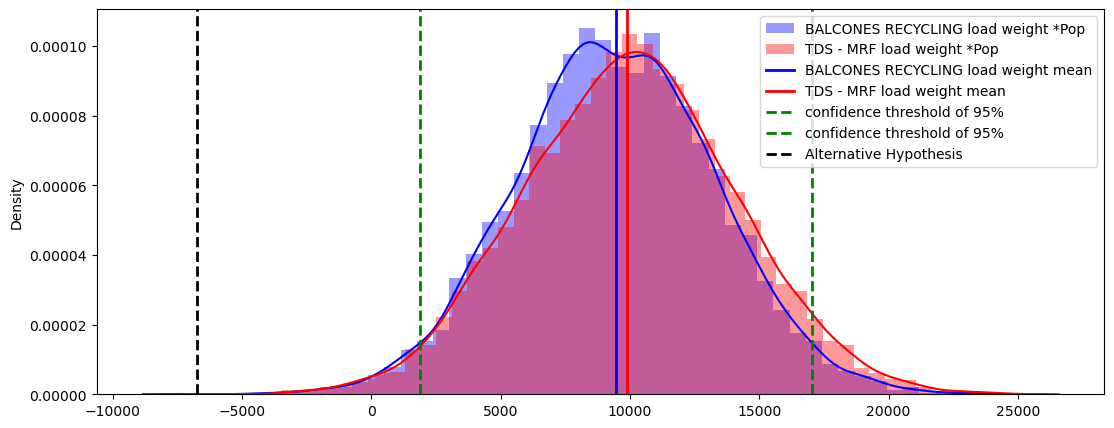

In [115]:
# simulation
tds_pop = np.random.normal(df1['load_weight'].mean(),df1['load_weight'].std(),10000)
organics_pop = np.random.normal(mrf['load_weight'].mean(),mrf['load_weight'].std(),10000)

# confidence interval pada BALCONES RECYCLING
# memakai cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, df1['load_weight'].mean(), df1['load_weight'].std())

plt.figure(figsize=(13,5))
sns.distplot(tds_pop, label='BALCONES RECYCLING load weight *Pop',color='blue')
sns.distplot(organics_pop, label='TDS - MRF load weight *Pop',color='red')

# mean
plt.axvline(df1['load_weight'].mean(), color='blue', linewidth=2, label='BALCONES RECYCLING load weight mean')
plt.axvline(mrf['load_weight'].mean(), color='red',  linewidth=2, label='TDS - MRF load weight mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(tds_pop.mean()+t_stat*tds_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')

plt.legend()
plt.show()

dari hasil statistic diatas p-value hampir bernilai 0. maka dari itu, hasilnya adalah gagal menolak H0.

insight yang akan diberikan kepada pemerintah adalah BALCONES RECYCLING sama dengan TDS - MRF. memacu dari informasi yang didapat dari 2 site, ide yang bagus untuk mendistribusikan sampah berdasarkan kategori agar pengolahan sampah dapat dilakukan dengan efisien dan mempercepat proses daur ulang dari setiap sampah. agar tidak tercampurnya sampah pada setiap kategori, hal tersebut perlu dilakukan karena mengingat setiap hari sampah meningkat setiap harinya.

### pemahaman konsep statistik

Pertanyaan:

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Jawaban:

1. Teknik yang digunakan untuk handling outliers adalah IQR karena site BALCONES RECYCLING load_weight merupakan data yang termasuk fairly symmetrical. dengan nilai skew 0,10 yang menurut saya cocok untuk memakai metode IQR

2. karena kita telah menganalisa salah satu site recycle terbesar di austin, jadi kita dapat membuat perkiraan bahwa data tersebut ada yang tidak komplit. ini merupakan hal yang baik dalam perkiraan untuk site baru.hal tersebut berdasarkan meas, standar deviasi tersebut berada dalam jarak perhitungan data. dan dengan menggunakan 95% confidence level, saya yakin bahwa dari 95% pasti termasuk upper dan lower values dari confidence interval

3. saya menggunakan t-test 2 sample 2 tailed karna saya ingin menguji rata-rata data dari BALCONES RECYCLING dan TDS - MRF sama atau tidak. dari pembuktian hipotesi sudah terbukti bahwa rata-rata dari site tersebut tidak jauh berbeda

## Problem 2

### Eksplorasi data

pemerintah menginginkan kita untuk memprediksi berapa kg sampah di Austin. kita akan menggunakan rumus kecepatan

W(besok) = W(hari ini) + V*Delta T

kita akan berasumsi Delta T adalah 1 karena memperkirakan untuk besok

pertama kita akan melakukan groupping load_weight dengan report_date

In [116]:
rumus = df.groupby('report_date')['load_weight'].sum().to_frame()
rumus

,load_weight
report_date,
2021-01-01,45200.0
2021-01-02,2204030.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2453050.0
...,...
2021-07-05,1897290.0
2021-07-06,1989440.0
2021-07-07,1654780.0


selanjutnya kita akan membuat variabel untuk menghitung diferensial data kita dan membaginya dengan diferensial range data

In [117]:
v = np.diff(rumus['load_weight'])/np.diff(range(166))

kemudian kita akan menghitung sampah besok dengan rumus yang sudah ada

In [118]:
w_besok = rumus['load_weight'][-1] + v[-1] * 1
abs(w_besok)

1188270.0

dari perhitungan diatas, kita dapat perkirakan bahwa besok total berat sampah adalah 1.189.197 KG

#### Pemahaman Konsep Matematika

Pertanyaan:

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

Jawaban:

1. pada problem ini, saya menggunakan metode numerik diterapkan pada fungsi .diff() dari library numpy

2. Ya, memang dibutuhkan. karena menghitung diferensial dari data membutuhkan fungsi matematika untuk memperkirakan berat sampah besok

3. perkiraan berat sampah untuk besok adalah 1.188.270 KG

# Kesimpulan

Dari challenge diatas, kita berawal dari query data dari google cloud platform untuk mengambil data yang ingin dianalisa. sesudah itu, kita cleaning data menggunakan pandas. lalu kita melakukan eksplorasi data menggunakan data tersebut.

dari analisa yang kita selesaikan, sampah di kota Austin tidak terdistribusi dengan baik. beberapa site memiliki kapasitas lebih besar dari yang lain. salah satunya yang telah kita analisis, BALCONES RECYCLING memiliki total berat 36.315.870 KG yang menjadi sampah ketiga terbesar di kota Austin. hal ini akan lebih baik jika sampah terdistribusi bahkan jika perlu sampah harus dipisahkan berdasarkan kategori untuk mempercepat proses daur ulang dari setiap sampah agar tidak semakin lama karena sudah tercampur dengan kategori sampah yang lain

kita juga dapat memprediksi load weight untuk keesokan harinya. berdasarkan perhitungan kita menggunakan diferensial, hasil perkiraan kita merupakan 1.188.270 KG